<html>
<head>
	<title>Initial Code and Results</title>
</head>
<body>
	<h1>Initial Code and Results</h1>
    <h2>Preprocessing</h2>
	<p>Import all the Python packages that will be used for the processing and analysis </p>
</body>
</html>

In [53]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from wordcloud import WordCloud
from PIL import Image
from textblob import TextBlob
from IPython.display import display


- Load data Twitter data into a variable
- Remove the columns that will not be used for the analysis




In [54]:
def load_data():
    brex_data = pd.read_excel (r'C:\Users\waina\Documents\Ryerson Courses\Capstone\Capstone Data\Twitter_Brexit.xlsx')
    return brex_data

data = load_data()
data.drop(['Row ID', 'Username', 'Time', 'Retweeted By', 'Hashtags', 'Mentions', 'Name', 'Web', 'Bio', 'Number of Tweets', 'Number of Followers','Number Following'], axis=1,inplace=True)

In [55]:
print('Dataset size:',data.shape)

Dataset size: (17997, 6)


Clean the tweets for the following:
- commonly used stopwords
- hyperlinks
- special characters
- added words identified to not add value after running the code several times over

Split the remaining tweets to individual words and put them in a DataFrame named 'Clean' 

Create a Dataframe of the cleaned tweets

In [56]:
def clean_tweet(tweet):
    
    clean = re.sub("(@[A-Za-z)-9]+)|([^)-9A-Za-z \t])|(\w+:\/\/\S+)"," ", tweet)
    clean = clean.lower().split()
    stops = set(stopwords.words("english"))
    stops2 = set(stopwords.words("french"))
    stops3 = set(stopwords.words("spanish"))
    stops4 = set((u'-', u'rt', u'r', u'https', u'el', u'.', u'brexit', u'brexit.', u'brexit,', u'si', u'vote', u'via', u','))
    allstops = stops|stops2|stops3|stops4
    clean = [w for w in clean if not w in allstops]
    return(clean)

tweet = data.Tweet

clean = []
for t in tweet:
    clean.append(clean_tweet(t))

clean_tweet = pd.DataFrame({'Tweet':clean})
clean_tweet['Tweet_st'] = [' '.join(map(str,l)) for l in clean_tweet['Tweet']]

#print(clean_tweet.head())
print('Data size of the Dataframe clean_tweet is :',clean_tweet.shape)

Data size of the Dataframe clean_tweet is : (17997, 2)


<h1> Sensitivity Analysis</h1>

Run a sentiment analysis using the package TextBlob. Classify the results of the analysis of each tweet into 'Positive', 'Negative' and 'Neutral'.

Show the results of the sensitivity analysis in a table.

In [57]:
clean_tweet = pd.DataFrame({'Tweet':clean})
clean_tweet['Tweet_st'] = [' '.join(map(str,l)) for l in clean_tweet['Tweet']]
clean_tweet['length'] = clean_tweet['Tweet'].apply(len)
clean_tweet = clean_tweet[clean_tweet.length != 0]
clean_tweet['sentiment'] = clean_tweet['Tweet_st'].apply(lambda Tweet: TextBlob(str(Tweet)).sentiment.polarity)
clean_tweet['classify'] = clean_tweet['sentiment'].apply(lambda x: 1 if x > 0 else ( 0 if x == 0 else -1)) 

def summary_data(x):
    a = len(x[x['classify'] == 1])
    b = len(x[x['classify'] == 0])
    c = len(x[x['classify'] == -1]) 
    d = {'Positive':[a],'Negative':[c],'Neutral':[b]}
    e = pd.DataFrame(d)
    return (e)

print("Below is a breakdown of tweets by  sentiment; Positive, Negative and Neutral")

display(summary_data(clean_tweet))

print("There are more positive than negative tweets in the dataset. Positive tweets exceed negative tweets by  :",clean_tweet['classify'].sum())


Below is a breakdown of tweets by  sentiment; Positive, Negative and Neutral


,Positive,Negative,Neutral
0,3577,1813,12029


There are more positive than negative tweets in the dataset. Positive tweets exceed negative tweets by  : 1764


Based on the results of the sensitivity analysis, the general mood is positive about the results of the Brexit vote. 

# Keyword Search

Using the tweets filtered for the sensitivity analysis, search the tweets for kewords that find the topics of interest that were the subject of discussion on tweeter.

Using the ntlk package perform word counts for frequently used words and filter the words and narrow the search to identify specific topics.

Visualize the word frequencies using Frequency Charts and Word Cloud.

The total number of word after cleaning the tweets is  21841
The frequency plot of the most used 300 words in the cleaned tweets is shown below


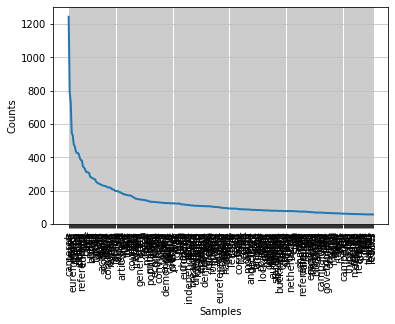

In [58]:
def flatten(li):
    flattened = []
    for item in li:
        for a in item:
            flattened.append(a)
    return(flattened)

def lst_st(st_words):
    to_string = (" ").join(st_words)
    return(to_string)

flat_clean = flatten(clean_tweet['Tweet'])
words_only = [x for x in flat_clean if x.isalpha()]
word_list = pd.DataFrame({'Words':words_only})
word_list.to_csv('Words.csv', mode = 'a')

wordcount = len(set(words_only))
print('The total number of word after cleaning the tweets is ', wordcount)

word_freq = nltk.FreqDist(words_only)

word_freq_table = pd.DataFrame(list(word_freq.items()), columns = ['Word','Frequency'])
word_freq_table.sort_values(by = ['Frequency'], inplace=True, ascending=False)
word_freq_table.to_csv('Word_Table.csv', sep=',', mode='a')

print("The frequency plot of the most used 300 words in the cleaned tweets is shown below")
word_freq.plot(300)

In [59]:
print("The most frequently used words are shown below.")

word_freq_table.head()

The most frequently used words are shown below.


,Word,Frequency
23,uk,1243
40,cameron,792
46,leave,730
253,voted,547
43,euref,531


## Filter Word List

From the results of the keyword search there is a huge range on the frequency of the words used. A lot of these words do not assist to narrow down the topcs of interest.

To narrow down the word search, filter out the most commonly used words and the least commonly used. Use the Frequency Dataframe to filter out the words. Visualize the filtered word list using by creating a Word Cloud



In [60]:
def word_filter(a,b):
    c = set(b)
    filtered = [w for w in a if w in c]
    return filtered

def freq_chart(dat):
    a = plt.hist(dat, bins=None)
    plt.gca().set(title='Frequency Histogram')
    return (a)

def Word_Cloud(lst):
    wordcloud = WordCloud(width=1280, height=853, margin=0,  colormap='Blues').generate(lst)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.show()
    return wordcloud

select_words = word_freq_table
select_words['Choose'] = select_words['Frequency'].apply(lambda x: 1 if 100 <= x <= 150 else 0)
select_words = select_words[select_words.Choose != 0]
select_words.to_csv('Selected_Words.csv', sep=',', mode='a')
selected = select_words['Word']
filter_words = word_filter(words_only,selected)
filter_words = lst_st(filter_words)
d = select_words.drop(['Choose'], axis = 1)
print("The top most frequent words in the filtered word list are shown below ")
d.head()


#freq_chart(d['Frequency'])
#Word_Cloud(filter_words)

The top most frequent words in the filtered word list are shown below 


,Word,Frequency
72,half,149
1763,years,147
295,tell,147
826,generation,146
575,b,145


(array([ 8., 18.,  7.,  6., 11., 11.,  8.,  2.,  5.,  5.]),
 array([100. , 104.9, 109.8, 114.7, 119.6, 124.5, 129.4, 134.3, 139.2,
        144.1, 149. ]),
 <a list of 10 Patch objects>)

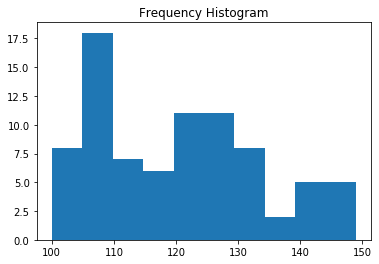

In [61]:
freq_chart(d['Frequency'])

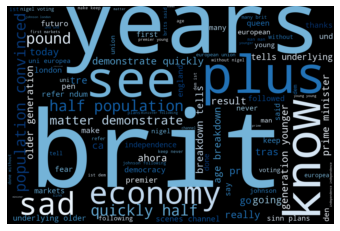

In [62]:
Word_Cloud(filter_words)